In [116]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan

In [117]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel("/content/drive/My Drive/FINC612 A02/data.xlsx", sheet_name="Part1")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     5771.
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:23:04   Log-Likelihood:                -2603.5
No. Observations:                1000   AIC:                             5211.
Df Residuals:                     998   BIC:                             5221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3144      0.103     12.701      0.0

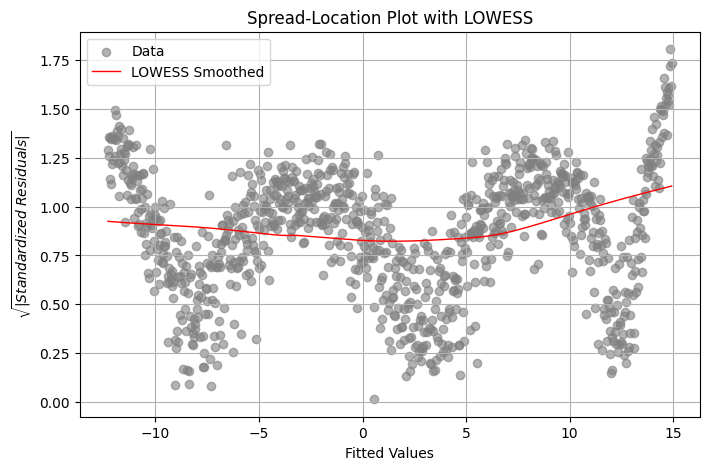

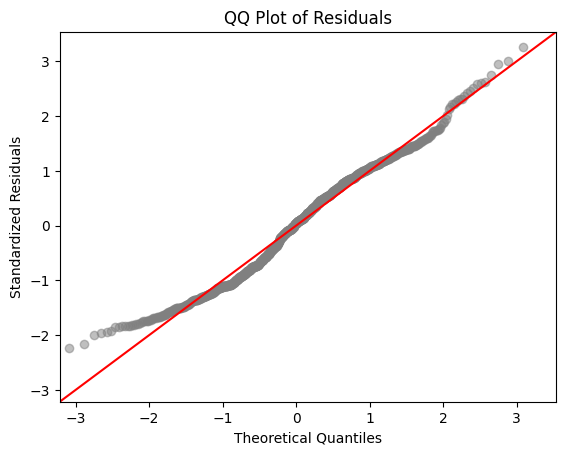

In [118]:
#1a:Estimate a simple linear regression model and Interpret the estimation result (p-values and R2).
X = sm.add_constant(data["x"])
model = sm.OLS(data["y"], X).fit()
print(model.summary())

#1b:Spread-Location
fitted_vals = model.fittedvalues
residuals = model.resid
print(1 - residuals.var() / data["y"].var()) # R2

standardized_residuals = residuals / np.std(residuals)
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

# LOWESS smoothing
lowess_smoothed = lowess(sqrt_standardized_residuals, fitted_vals)

# Residual Analytic Plots
plt.figure(figsize=(8, 5))
plt.scatter(fitted_vals, sqrt_standardized_residuals, color='gray', alpha=0.6, label='Data')
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', linewidth=1, label='LOWESS Smoothed')
plt.title('Spread-Location Plot with LOWESS')
plt.xlabel('Fitted Values')
plt.ylabel(r'$\sqrt{|Standardized\ Residuals|}$')
plt.legend()
plt.grid(True)
plt.show()

#1b: QQ-plot
sm.qqplot(standardized_residuals, line='45', fit=True, markerfacecolor='gray', alpha=0.5, markeredgecolor='gray')
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()


1a: Interpret the estimation result (p-values and R2)

The p-values of the estimated intercept and the slope coefficient are both 0.00, which are highly significant.

The R-Squared is 0.853, which means 85.3% of the variation can be explained by the independent variable.

1b: Interpret the Spread-Location and the QQ-plot


In the Spread-Location plot, the residuals are spread out at the ends. The LOWESS line went upward at the end, which shows it might have heteroscedasticity.

In the QQ-plot, most of the points are along the line, which shows the theoretical assumption is correct.

In [119]:
#2. Find the appropriate polynomial using the RESET test
outlier = False
misspecification = True
heteroscedasticity = False

if outlier:
    data.iloc[np.argmax(data["y"]),1] = data.iloc[np.argmax(data["y"]),1] * 5
data['x2'] = data['x']**2

X = sm.add_constant(data[["x", "x2"]])
if misspecification:
    X = sm.add_constant(data[["x", "x2"]])
model = sm.OLS(data["y"], X).fit()
print(model.summary())

if misspecification:
    reset_result = linear_reset(model, power=4, use_f=True)
    print("RESET Test:")
    print(f"F-statistic: {reset_result.fvalue:.4f}")
    print(f"p-value: {reset_result.pvalue:.4f}")

    if reset_result.pvalue < 0.10: # 10% significance level
        print("Reject null: Model may be misspecified. Consider higher-order terms.")
    else:
        print("Fail to reject null: No strong evidence of misspecification.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     2974.
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:23:05   Log-Likelihood:                -2590.2
No. Observations:                1000   AIC:                             5186.
Df Residuals:                     997   BIC:                             5201.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9064      0.153     12.439      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:23:05   Log-Likelihood:                -1706.3
No. Observations:                1000   AIC:                             3421.
Df Residuals:                     996   BIC:                             3440.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9064      0.063     30.093      0.0

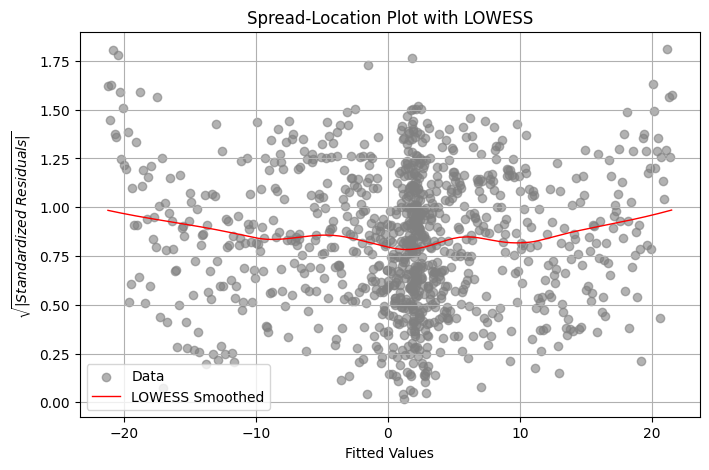

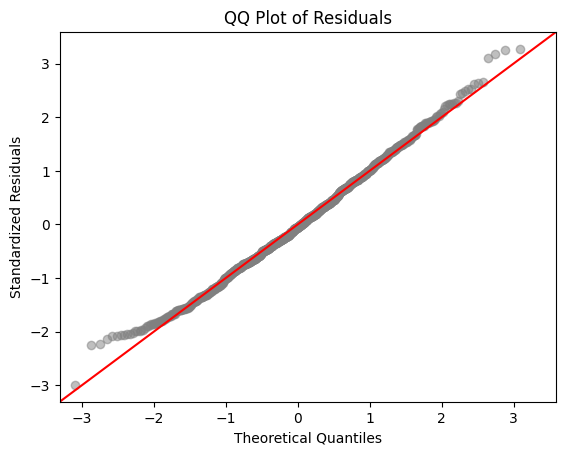

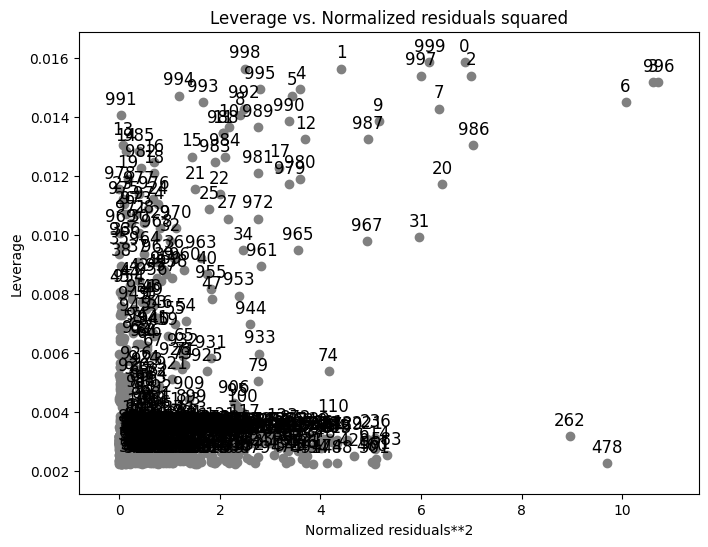

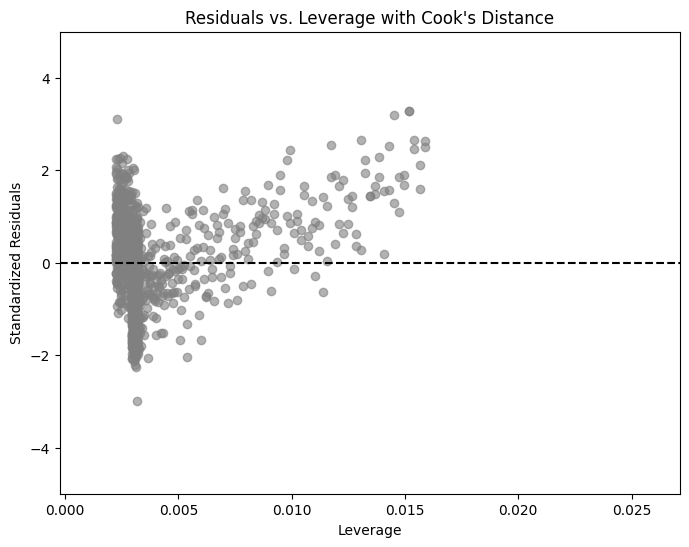

In [120]:
outlier = False
misspecification = False
heteroscedasticity = False

if outlier:
    data.iloc[np.argmax(data["y"]), 1] = data.iloc[np.argmax(data["y"]), 1] * 5
data['x2'] = data['x']**2
data['x3'] = data['x']**3
data['x4'] = data['x']**4

X = sm.add_constant(data[["x", "x2", "x3"]])
if misspecification:
    X = sm.add_constant(data[["x", "x2"]])

model = sm.OLS(data["y"], X).fit()
print(model.summary())

reset_result = linear_reset(model, power=4, use_f=True)
print("RESET Test:")
print(f"F-statistic: {reset_result.fvalue:.4f}")
print(f"p-value:     {reset_result.pvalue:.4f}")

if reset_result.pvalue < 0.10:
      print("Reject null: Model may be misspecified. Consider higher-order terms.")
      X_1 = sm.add_constant(data[['x','x2','x3','x4']])
      model_1 = sm.OLS(data['y'], X_1).fit()
      print(model_1.summary())
      reset_result1 = linear_reset(model_1, power=4, use_f=True)
      print("RESET Test:")
      print(f"F-statistic: {reset_result1.fvalue:.4f}")
      print(f"p-value:     {reset_result1.pvalue:.4f}")
      if reset_result1.pvalue > 0.10:
         print("Fail to reject null: No strong evidence of misspecification.")
else:
      print("Fail to reject null: No strong evidence of misspecification.")

# Calculate fitted values and residuals
fitted_vals = model.fittedvalues
residuals = model.resid
print(1 - residuals.var() / data["y"].var()) # R2
# Shapiro-Wilk Normality Test
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test:")
print(f"Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}\n")

# Jarque-Bera Normality Test
jb_stat, jb_pval, _, _ = jarque_bera(residuals)
print("Jarque-Bera Test:")
print(f"Statistic = {jb_stat:.4f}, p-value = {jb_pval:.4f}\n")

# Homoskedasticity Test (Breusch-Pagan)
bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test:")
print(f"LM Stat = {bp_test[0]:.4f}, p-value = {bp_test[1]:.4f}\n")

standardized_residuals = residuals / np.std(residuals)
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

# LOWESS smoothing
lowess_smoothed = lowess(sqrt_standardized_residuals, fitted_vals)

# Residual Analytic Plots
plt.figure(figsize=(8, 5))
plt.scatter(fitted_vals, sqrt_standardized_residuals, color='gray', alpha=0.6, label='Data')
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', linewidth=1, label='LOWESS Smoothed')
plt.title('Spread-Location Plot with LOWESS')
plt.xlabel('Fitted Values')
plt.ylabel(r'$\sqrt{|Standardized\ Residuals|}$')
plt.legend()
plt.grid(True)
plt.show()

# QQ Plot of residuals
sm.qqplot(standardized_residuals, line='45', fit=True, markerfacecolor='gray', alpha=0.5, markeredgecolor='gray')
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

# Get influence measures
influence = OLSInfluence(model)

# Residuals vs. Leverage Plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_leverage_resid2(model, ax=ax, alpha=0.6, color='gray')

# Get leverage, standardized residuals, and Cook's distance
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal
cooks_d = influence.cooks_distance[0]
n = X.shape[0]
p = X.shape[1]  # includes intercept

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(leverage, standardized_residuals,
                     alpha=0.6, edgecolors='gray', facecolors='gray')
ax.axhline(0, linestyle='dashed', color='black')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')
ax.set_title('Residuals vs. Leverage with Cook\'s Distance')

# Cook's distance contours (using leverage grid)
leverage_grid = np.linspace(0.001, leverage.max() + 0.01, 100)
for d in [0.5, 1]:
    bound = np.sqrt(d * p * (1 - leverage_grid) / leverage_grid)
    ax.plot(leverage_grid,  bound, '--', color='red', lw=1)
    ax.plot(leverage_grid, -bound, '--', color='red', lw=1)

ylimit = np.max(np.abs(standardized_residuals))
ax.set_ylim(-np.max([ylimit, 5]), np.max([ylimit, 5]))
plt.show()


2a. Interpret the RESET test outcome.

The RESET test gives F-statistic is 3303.0870 and p-value is 0.0000. We reject H0 and conclude the quadratic model is misspecified.

2b. How did you determine which polynomial is appropriate?

We start with a low-order model (linear or quadratic). Then increase the order until RESET is no longer significant. Cubic and quartic terms allow more flexible curvature.

2c. How is the RESET test implemented in terms of hypothesis testing? Explain
how the RESET test statistic works in detail.

The RESET test works by adding powers of the fitted values into the regression. If all added terms are zero, it means the model is correct. In F-test, if all γ coefficients are zero is rejected, then the model suffers from misspecification.

3a. Interpret the estimation result (p-values and R2).

In the cubic model, the R-squared is 0.975, which shows a strong fit.

The p-values of all coefficients are 0.000, which shows the polynomial terms are significant.

3b. Interpret the Spread-Location and the QQ-plot.
In the Spread-Location plot, the residuals are spread out at the two ends,  which shows it might have heteroskedasticity.

In the QQ-plot, most of the points are along the line, which shows the residuals are approximately normal.

3c. Conduct the RESET test and explain the output. Is it consistent with your
expectations?

The RESET test for the cubic model reports an F-statistic of 283.37 and a p-value of 0.0000. The null hypothesis of correct model specification is rejected, indicating misspecification. This suggests that the model should include higher-order terms to better capture the nonlinear relationship. When we add the quartic model, the RESET test yields an F-statistic of 1.22 and a p-value of 0.3005. Since the p-value is greater than 0.10, we fail to reject the null hypothesis, indicating that there is no strong evidence of model misspecification. This result is consistent with expectations: Q2 shows that the quadratic model is insufficient, Q3 finds that the cubic model is still insufficient, and the quartic model ultimately corrects the misspecification.